In [69]:
import pandas as pd
import numpy as np
import talib as ta
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from datetime import datetime
from ta import add_all_ta_features
import matplotlib.pyplot as plt

In [70]:

df = pd.read_csv(
        r'C:\Users\MrBios\Documents\Development\test\csv\Featured_bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv',
)


MemoryError: Unable to allocate 2.45 GiB for an array with shape (91, 3613769) and data type float64

In [ ]:

bitcoin_data=df[-10000:-5000]
to_test=df[-60:]

In [ ]:
# Preprocess the data
# bitcoin_data = bitcoin_data[['Close']]

bitcoin_data.dropna(inplace=True)


C:\Users\MrBios\AppData\Local\Temp\ipykernel_33380\654101896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_data.dropna(inplace=True)


In [ ]:
bitcoin_data.drop(columns=["Timestamp"], inplace=True)
# count number of features
n_features = bitcoin_data.shape[1]
print(n_features)

C:\Users\MrBios\AppData\Local\Temp\ipykernel_33380\559563617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_data.drop(columns=["Timestamp"], inplace=True)


,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
3603769,53932.65,53964.98,53890.49,53933.94,4.461309,1059547.9,2012090.9,-0.273133,17.961173,-7.088886e+10,...,-0.053609,-0.086848,0.033239,-7.964032,-10.508159,2.544127,54005.428715,-0.012124,-0.012112,1228463.6
3603770,53941.21,53941.21,53881.91,53924.01,0.895911,1059548.2,2012090.0,-0.248255,14.124417,-1.070553e+11,...,-0.058218,-0.081122,0.022904,-12.362100,-10.878947,-1.483153,54003.528281,-0.018412,-0.018406,1228237.4
3603771,53913.64,54000.07,53906.62,54000.07,0.813743,1059549.1,2012090.9,-0.218465,20.948375,4.798557e+11,...,-0.049925,-0.074883,0.024957,-16.433398,-11.989837,-4.443560,54003.485610,0.141048,0.140953,1229970.0
3603772,54026.47,54029.61,53947.83,53986.99,1.425590,1059549.1,2012089.5,-0.166399,15.291519,2.029231e+11,...,-0.044793,-0.068865,0.024072,-17.190867,-13.030043,-4.160824,54003.236287,-0.024223,-0.024223,1229672.0
3603773,53986.98,54021.16,53958.20,54000.64,0.814179,1059549.4,2012090.4,-0.186342,14.694939,7.430981e+09,...,-0.038243,-0.062740,0.024497,-20.448020,-14.513639,-5.934381,54003.216834,0.025284,0.025272,1229983.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608764,54099.56,54200.00,54099.56,54171.56,0.626708,1059427.9,2010871.4,0.058323,-49.966083,-5.481050e+10,...,-0.195301,-0.151118,-0.044183,-11.331125,-11.990876,0.659752,54308.879383,0.097287,0.097179,1233876.2
3608765,54187.38,54205.49,54124.47,54178.55,1.177142,1059428.2,2010872.5,0.037466,-41.652243,1.046122e+11,...,-0.194579,-0.159810,-0.034769,-12.929706,-12.178642,-0.751064,54293.016418,0.012910,0.012970,1234035.5
3608766,54198.99,54198.99,54049.95,54064.49,1.478207,1059427.0,2010871.0,0.000099,-59.788776,-4.084366e+11,...,-0.208577,-0.169563,-0.039014,-12.647720,-12.272458,-0.375262,54260.258924,-0.210530,-0.210762,1231437.4
3608767,54072.04,54089.41,54000.00,54033.67,7.114695,1059425.2,2010863.9,-0.045622,-82.568855,-1.002388e+11,...,-0.221722,-0.179995,-0.041727,10.513759,-7.715214,18.228973,54231.170077,-0.057000,-0.057030,1230735.4


In [71]:
n_features = bitcoin_data.shape[1]
print(n_features)

91


In [ ]:
# Scale the data
scaler = MinMaxScaler()
bitcoin_data_scaled = scaler.fit_transform(bitcoin_data)

In [79]:

# Create sequences of data with a given time step
time_step = 60  # Number of previous time steps to consider for predicting the next time step
X = []
y = []
for i in range(time_step, len(bitcoin_data_scaled)):
    X.append(bitcoin_data_scaled[i - time_step:i, 1:])
    y.append(bitcoin_data_scaled[i, 0])
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# how many features we have
n_features = X_train.shape[2]
print(n_features)
# list of features
features = bitcoin_data.columns[1:]
print(features)

90
Index(['High', 'Low', 'Close', 'Volume', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt',
       'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
       'volatility_atr', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
       'trend_ema_slow', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_dpo',
       'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'trend_ichimoku_base', 't

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=2))


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
62/62 [==============================] - 5s 44ms/step - loss: 0.0188
Epoch 2/50
62/62 [==============================] - 3s 44ms/step - loss: 0.0050
Epoch 3/50
62/62 [==============================] - 3s 44ms/step - loss: 0.0043
Epoch 4/50
62/62 [==============================] - 3s 44ms/step - loss: 0.0040
Epoch 5/50
62/62 [==============================] - 3s 43ms/step - loss: 0.0038
Epoch 6/50
62/62 [==============================] - 3s 43ms/step - loss: 0.0033
Epoch 7/50
62/62 [==============================] - 3s 43ms/step - loss: 0.0029
Epoch 8/50
62/62 [==============================] - 3s 43ms/step - loss: 0.0029
Epoch 9/50
62/62 [==============================] - 3s 43ms/step - loss: 0.0027
Epoch 10/50
62/62 [==============================] - 3s 43ms/step - loss: 0.0026
Epoch 11/50
62/62 [==============================] - 3s 43ms/step - loss: 0.0024
Epoch 12/50
62/62 [==============================] - 3s 43ms/step - loss: 0.0023
Epoch 13/50
62/62 [==================

In [ ]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

Train Loss: 0.00010861452028620988
Test Loss: 0.00010884639777941629


In [ ]:
model.save("bitcoin_model.h5")

In [ ]:
%pip install ccxt

Note: you may need to restart the kernel to use updated packages.


In [82]:
import ccxt

In [83]:
ccxt_client = ccxt.binance()
ccxt_client.load_markets()

{'ETH/BTC': {'id': 'ETHBTC',
  'symbol': 'ETH/BTC',
  'base': 'ETH',
  'quote': 'BTC',
  'baseId': 'ETH',
  'quoteId': 'BTC',
  'active': True,
  'type': 'spot',
  'linear': None,
  'inverse': None,
  'spot': True,
  'swap': False,
  'future': False,
  'option': False,
  'margin': True,
  'contract': False,
  'contractSize': None,
  'expiry': None,
  'expiryDatetime': None,
  'optionType': None,
  'strike': None,
  'settle': None,
  'settleId': None,
  'precision': {'amount': 4, 'price': 5, 'base': 8, 'quote': 8},
  'limits': {'amount': {'min': 0.0001, 'max': 100000.0},
   'price': {'min': 1e-05, 'max': 922327.0},
   'cost': {'min': 0.0001, 'max': 9000000.0},
   'leverage': {'min': None, 'max': None},
   'market': {'min': 0.0, 'max': 2319.1941775}},
  'info': {'symbol': 'ETHBTC',
   'status': 'TRADING',
   'baseAsset': 'ETH',
   'baseAssetPrecision': '8',
   'quoteAsset': 'BTC',
   'quotePrecision': '8',
   'quoteAssetPrecision': '8',
   'baseCommissionPrecision': '8',
   'quoteCommiss

In [97]:
# fetch 1 minute data for the last 120 minutes
ccxt_data = ccxt_client.fetch_ohlcv('BTC/USDT', timeframe='1m', limit=120)

In [98]:
# convert to pandas dataframe
ccxt_df = pd.DataFrame(ccxt_data, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
# # convert to datetime
# ccxt_df['Timestamp'] = pd.to_datetime(ccxt_df['Timestamp'], unit='ms')
# # set index
# ccxt_df.set_index('Timestamp', inplace=True)
# # resample to 1 minute
# ccxt_df = ccxt_df.resample('1T').mean()
# drop NaNs
ccxt_df.dropna(inplace=True)
ccxt_df.drop(columns=["Timestamp"], inplace=True)

In [99]:
# add technical indicators
ccxt_df = add_all_ta_features(ccxt_df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=False)
# ccxt_df=ccxt_df[['High', 'Low', 'Close', 'Volume', 'volume_adi', 'volume_obv',
#        'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt',
#        'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm',
#        'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
#        'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
#        'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
#        'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
#        'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
#        'volatility_atr', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
#        'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
#        'trend_ema_slow', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
#        'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_dpo',
#        'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
#        'trend_ichimoku_base', 'trend_ichimoku_a', 'trend_ichimoku_b',
#        'trend_stc', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_cci',
#        'trend_visual_ichimoku_a', 'trend_visual_ichimoku_b', 'trend_aroon_up',
#        'trend_aroon_down', 'trend_aroon_ind', 'trend_psar_up',
#        'trend_psar_down', 'trend_psar_up_indicator',
#        'trend_psar_down_indicator', 'momentum_rsi', 'momentum_stoch_rsi',
#        'momentum_stoch_rsi_k', 'momentum_stoch_rsi_d', 'momentum_tsi',
#        'momentum_uo', 'momentum_stoch', 'momentum_stoch_signal', 'momentum_wr',
#        'momentum_ao', 'momentum_roc', 'momentum_ppo', 'momentum_ppo_signal',
#        'momentum_ppo_hist', 'momentum_pvo', 'momentum_pvo_signal',
#        'momentum_pvo_hist', 'momentum_kama', 'others_dr', 'others_dlr',
#        'others_cr']]

c:\Users\MrBios\anaconda3\lib\site-packages\ta\trend.py:730: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  self._trs[0] = diff_directional_movement.dropna()[
c:\Users\MrBios\anaconda3\lib\site-packages\ta\trend.py:748: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  self._dip[0] = pos.dropna()[0: self._window].sum()
c:\Users\MrBios\anaconda3\lib\site-packages\ta\trend.py:760: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version

In [100]:

# Scale the data
ccxt_data_scaled = scaler.transform(ccxt_df)


In [113]:
time_step = 60  # Number of previous time steps to consider for predicting the next time step
X_pred = []
for i in range(time_step, len(ccxt_data_scaled)):
    X_pred.append(ccxt_data_scaled[i - time_step:i, 1:])
X_pred = np.array(X_pred)


In [114]:
# Predict the price
predicted_price = model.predict(X_pred)

2/2 [==============================] - 0s 8ms/step


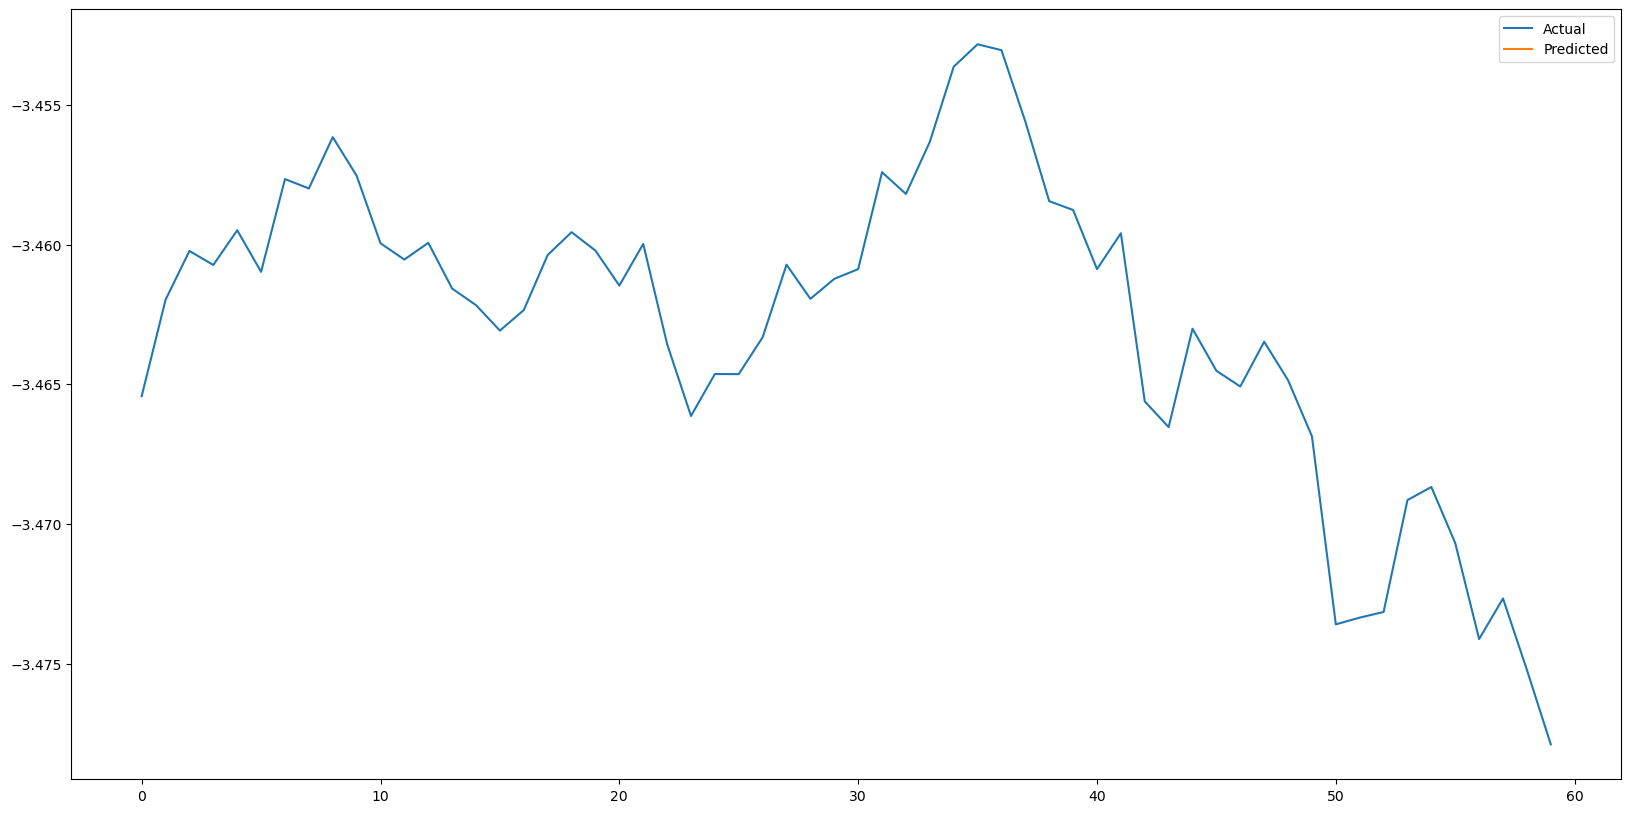

In [107]:
plot_df = pd.DataFrame()
plot_df['Actual'] = ccxt_data_scaled[time_step:, 0]
plot_df['Predicted'] = predicted_price[:, 0]
plot_df.plot(figsize=(20, 10))
plt.show()

In [106]:
predicted_price = scaler.inverse_transform(predicted_price)

ValueError: operands could not be broadcast together with shapes (60,2) (91,) (60,2) 

In [104]:
predicted_price = predicted_price[:, 0]

2/2 [==============================] - 0s 7ms/step


ValueError: operands could not be broadcast together with shapes (60,2) (91,) (60,2) 